In [1]:
import sys
sys.path.insert(0, '../')

import numpy as np
import matplotlib.pyplot as plt
from run_experiment import *


%load_ext autoreload
%autoreload 2

**Comparing the behavior of algorithms together in different graphs** 

Graph creation...
Graph creation : Done
-------------------------------------------------------------------------------------------
Using the graph : Random_Sparse_graph
Agents creation, fixed (start, destination) assignment and all possible paths computation ...
Agents creation, fixed (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Testing 3300 combination of paths
Total time to compute costs:4.98 s
 => The minimal cost is :  7.0
 => The optimal paths are :  [[9, 17], [8, 17, 3, 12, 10], [8, 5, 2]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
sto1   {'path': [9, 17], 'cost': 1.0}
adv1   {'path': [8, 17, 3, 12, 10], 'cost': 5.0}
hyb1   {'path': [8, 17, 7, 13, 19, 10, 14, 5, 2], 'cost': 9.0}
Final total cost on the network : 15.0


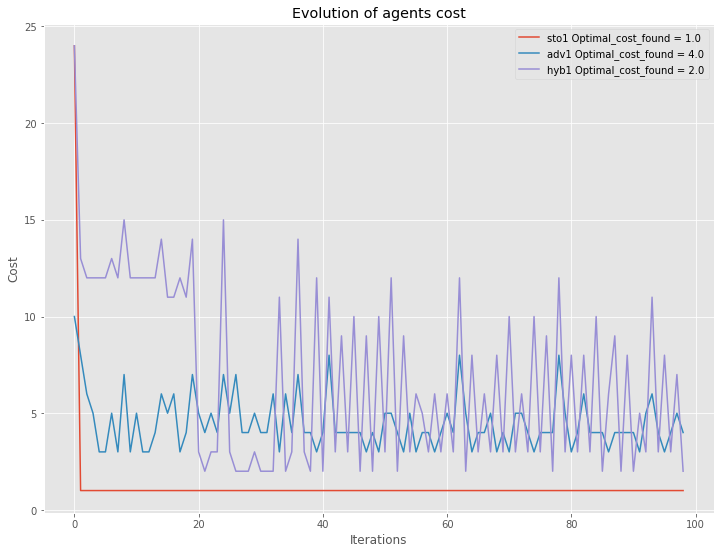

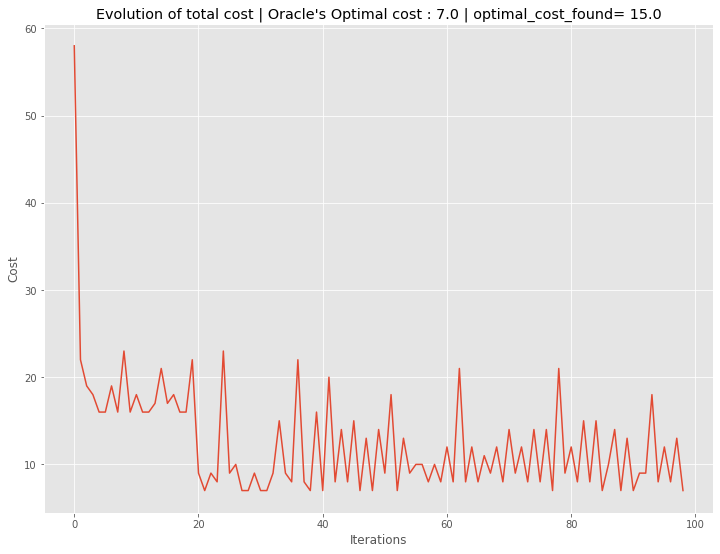

****************************************************************************************************************************
Graph creation...
Graph creation : Done
-------------------------------------------------------------------------------------------
Using the graph : Sioux_Falls
Agents creation, fixed (start, destination) assignment and all possible paths computation ...
Agents creation, fixed (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...


KeyboardInterrupt: 

In [43]:
graphs = ['Random_Sparse_graph', 'Sioux_Falls', 'OW']
n_players = 1
for graph in graphs : 
    g, adj_matrix, all_edges = create_graph(graph_type=graph, number_vertices=20, dropout_edge_rate=0.9)
    print('Using the graph : '+ graph, end='\n')
    summary_experiences, dests = run_experiment_compar(g, adj_matrix, all_edges, assignement_type='fixed', nb_iterations=100, n_sto=n_players, n_adv=n_players, n_hyb=n_players, 
                           n_rand=0, n_fix=0, exploration_parameter_stoc=5, lr_type_exp2=3, eta_hyb=0.1, Bt_hyb=0.01, use_adaptif_lr_hyb=True,
                        gamma_hyb=1., time_limit=60)

**Using Adaptif learning rate for Hybrid agent**

Graph creation...
Graph creation : Done
-------------------------------------------------------------------------------------------
Using Adaptif learning  = False
Agents creation, fixed (start, destination) assignment and all possible paths computation ...
Agents creation, fixed (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 40 seconds, only 15433 combinations where tested
Total time to compute costs:40.01 s
 => The minimal cost is :  131.0
 => The optimal paths are :  [[12, 9, 6], [3, 6, 9], [1, 3, 6, 9, 11], [12, 10, 7, 4, 1], [7, 3, 2], [12, 10, 6, 5]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
sto1   {'path': [12, 10, 9, 6], 'cost': 23.0}
sto2   {'path': [3, 6, 9], 'cost': 10.0}
adv1   {'path': [1, 4, 3, 7, 10, 6, 2, 5, 8, 9, 11], 'cost': 106.0}
adv2   {'path': [12, 9, 11, 8, 5, 2, 6, 3, 7, 4, 1], 'cost': 121.0}
hyb1   {'path': [7, 10, 12, 9, 11, 8, 5, 6, 3, 2], 'cost': 67.0}
hyb2   {'path': [12, 9, 10, 7, 4, 1, 3, 6, 2, 5], 'cost': 108.0}
Final total cost on the network : 435.0


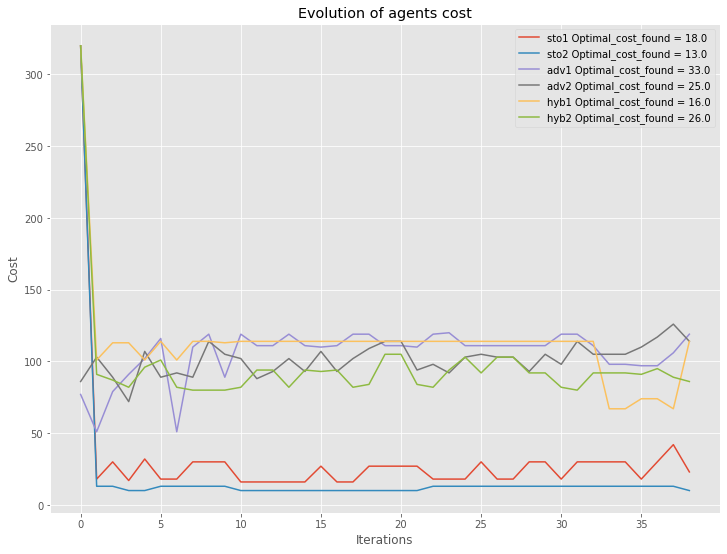

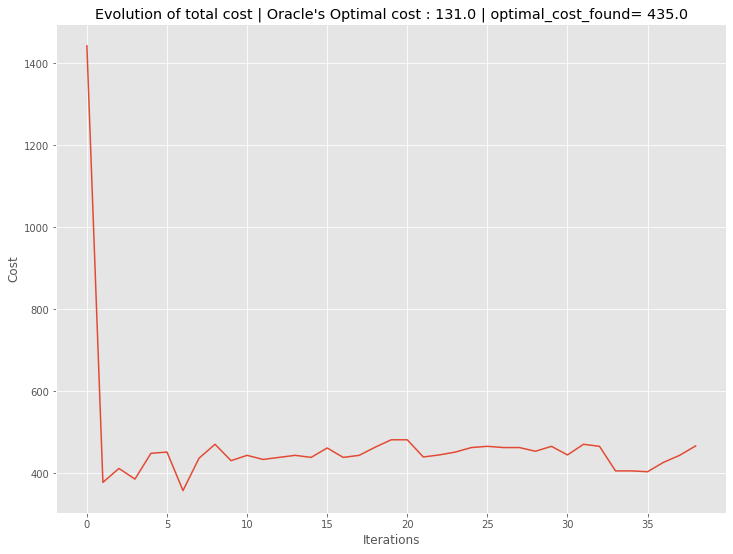

****************************************************************************************************************************
Using Adaptif learning  = True
Agents creation, fixed (start, destination) assignment and all possible paths computation ...
Agents creation, fixed (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 40 seconds, only 35976 combinations where tested
Total time to compute costs:40.00 s
 => The minimal cost is :  131.0
 => The optimal paths are :  [[12, 9, 6], [3, 6, 9], [1, 3, 6, 9, 11], [12, 10, 7, 4, 1], [7, 3, 2], [12, 10, 6, 5]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
sto1   {'path': [12, 10, 6], 'cost': 32.0}
sto2   {'path': [3, 6, 9], 'cost': 10.0}
adv1   {'path': [1, 4, 7, 3, 2, 5, 6, 10, 12, 9, 11], 'cost': 102.0}
adv2   {'path': [12, 10, 6, 9, 11, 8, 5, 2, 3, 7, 4, 1], 'cost': 114.0}
hyb1   {'path': [7, 10, 9, 11, 8, 5, 6, 3, 2], 'cost': 78.0}
hyb2   {'path': [12, 10, 7, 4, 1, 3, 2, 6, 9, 11, 8, 5], 'cost': 84.0}
Final total cost on the network : 420.0


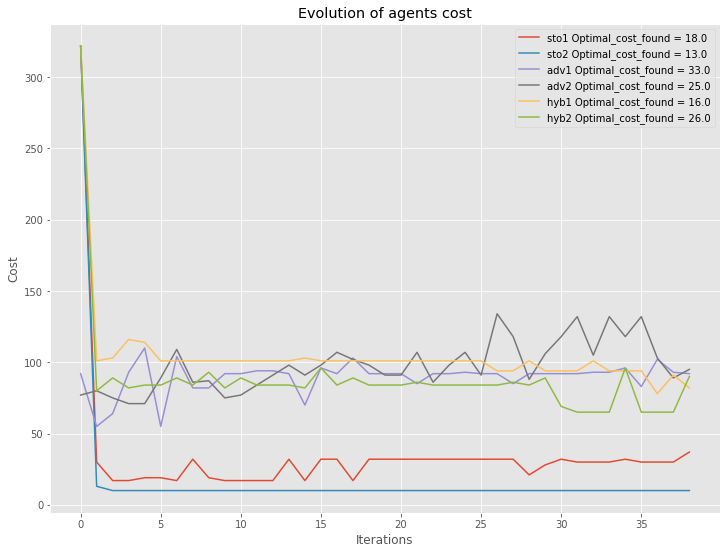

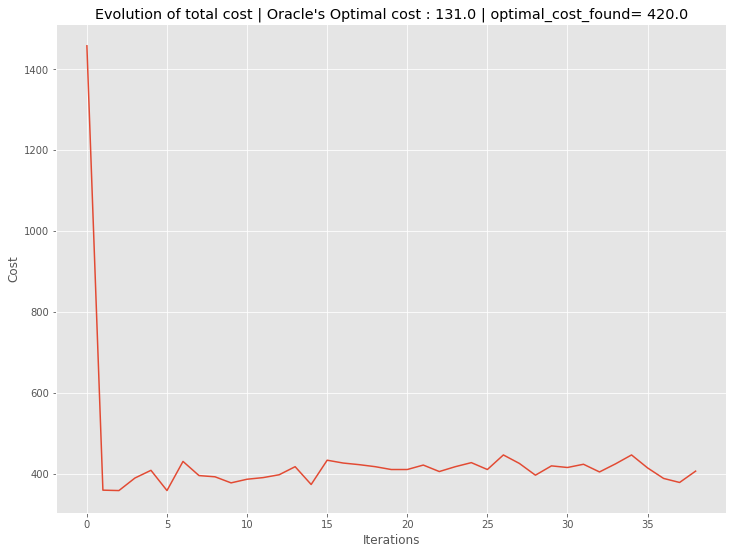

****************************************************************************************************************************


In [33]:
n_players = 2
Adaptif_learning = [False, True]
graph = 'OW'
g, adj_matrix, all_edges = create_graph(graph_type=graph, number_vertices=20, dropout_edge_rate=0.85)
for i, al_ in enumerate(Adaptif_learning) : 
    print('Using Adaptif learning  = {}'.format(al_), end='\n')
    if i==0:
        summary_experiences, dests = run_experiment_compar(g, adj_matrix, all_edges, assignement_type='fixed', nb_iterations=100, n_sto=n_players, n_adv=n_players, n_hyb=n_players, 
                                   n_rand=0, n_fix=0, exploration_parameter_stoc=5, eta_hyb=0.1, Bt_hyb=0.01, use_adaptif_lr_hyb=al_,
                                gamma_hyb=1., time_limit=40)
    else:
        summary_experiences, dests = run_experiment_compar(g, adj_matrix, all_edges, assignement_type='fixed', assignement_dests=dests, nb_iterations=100, n_sto=n_players, n_adv=n_players, n_hyb=n_players, 
                                   n_rand=0, n_fix=0, exploration_parameter_stoc=5, eta_hyb=0.1, Bt_hyb=0.01, use_adaptif_lr_hyb=al_,
                                gamma_hyb=1., time_limit=40)
        

**Impact of gamma parameter for Hybrid agent**

Graph creation...
Graph creation : Done
-------------------------------------------------------------------------------------------
Using Gamma for hybrid agents  = 0.5
Agents creation, fixed (start, destination) assignment and all possible paths computation ...
Agents creation, fixed (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 765 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  107.0
 => The optimal paths are :  [[7, 6], [7, 4], [2, 5, 8], [2, 3, 1], [10, 7], [4, 3, 6], [8, 9, 6, 2], [12, 10, 9]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
hyb1   {'path': [7, 6], 'cost': 9.0}
hyb2   {'path': [7, 3, 1, 4], 'cost': 53.0}
hyb3   {'path': [2, 5, 6, 9, 11, 8], 'cost': 37.0}
hyb4   {'path': [2, 3, 4, 1], 'cost': 36.0}
Final total cost on the network : 135.0


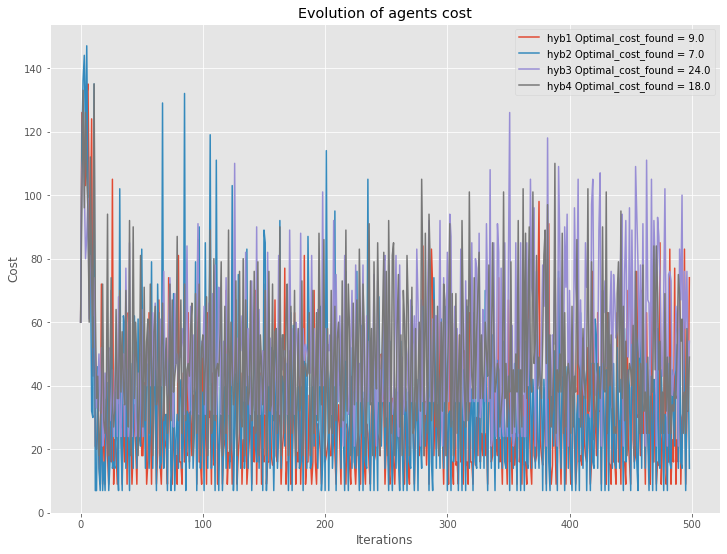

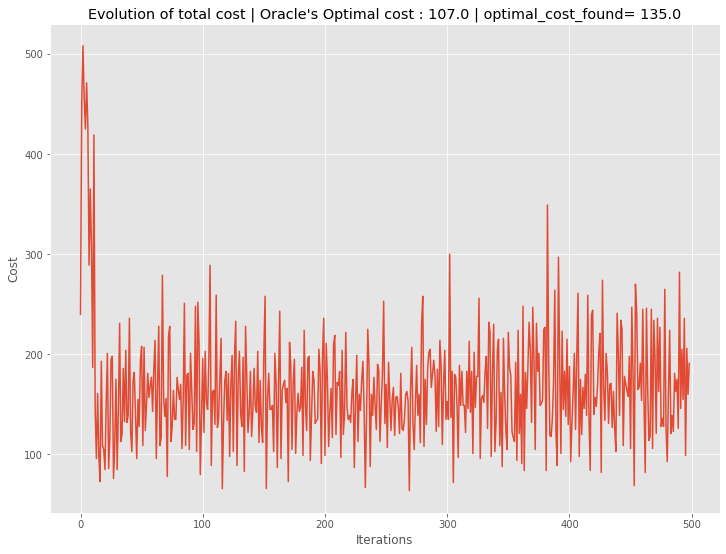

****************************************************************************************************************************
Using Gamma for hybrid agents  = 1
Agents creation, fixed (start, destination) assignment and all possible paths computation ...
Agents creation, fixed (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 802 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  131.0
 => The optimal paths are :  [[7, 6], [7, 4], [2, 5, 8], [2, 3, 1], [4, 3, 6, 9], [7, 6, 9], [7, 10, 9, 8], [12, 10, 7]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
hyb1   {'path': [7, 6], 'cost': 9.0}
hyb2   {'path': [7, 10, 6, 2, 3, 1, 4], 'cost': 101.0}
hyb3   {'path': [2, 3, 1, 4, 7, 6, 10, 9, 8], 'cost': 87.0}
hyb4   {'path': [2, 6, 3, 1], 'cost': 27.0}
Final total cost on the network : 224.0


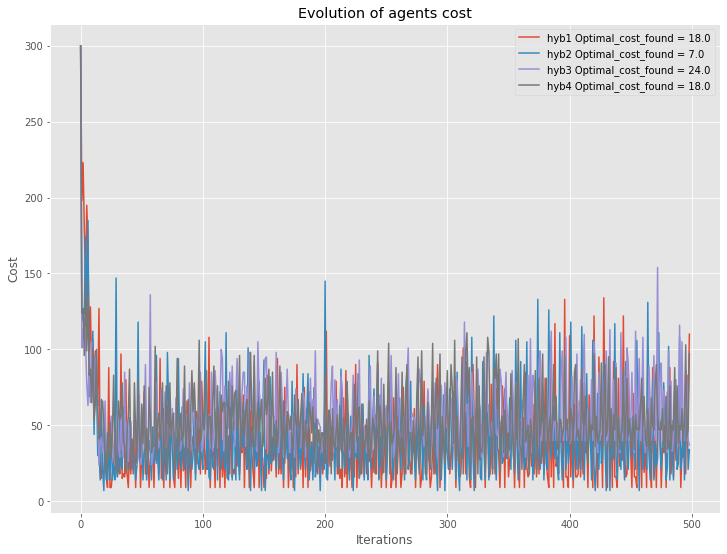

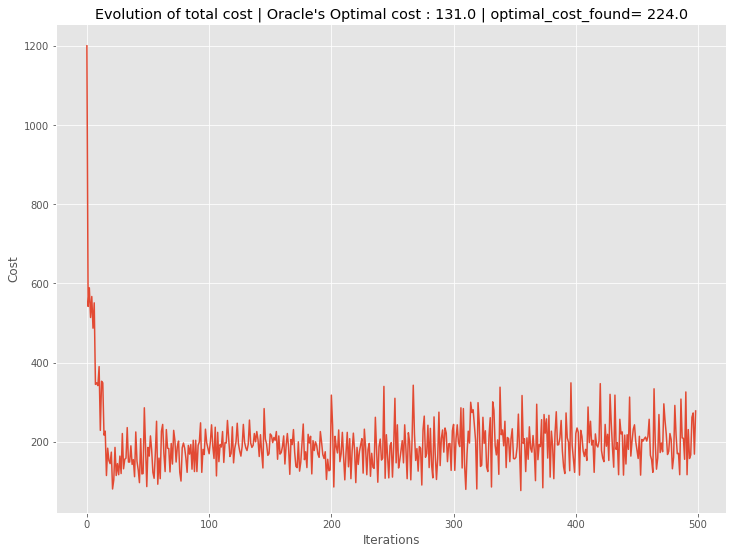

****************************************************************************************************************************
Using Gamma for hybrid agents  = 3
Agents creation, fixed (start, destination) assignment and all possible paths computation ...
Agents creation, fixed (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 945 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  132.0
 => The optimal paths are :  [[7, 6], [7, 4], [2, 5, 8], [2, 3, 1], [8, 5, 6], [12, 9, 6, 3], [5, 6, 9], [12, 10, 7, 4]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
hyb1   {'path': [7, 10, 6], 'cost': 16.0}
hyb2   {'path': [7, 4], 'cost': 7.0}
hyb3   {'path': [2, 5, 6, 7, 10, 9, 8], 'cost': 53.0}
hyb4   {'path': [2, 3, 1], 'cost': 18.0}
Final total cost on the network : 94.0


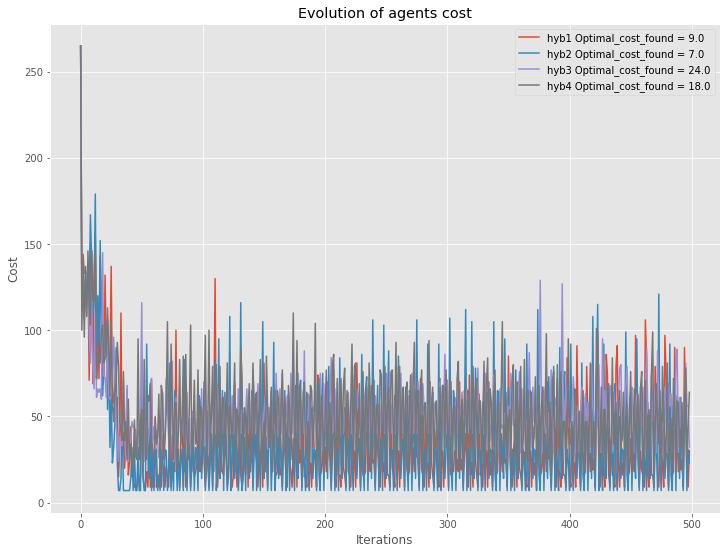

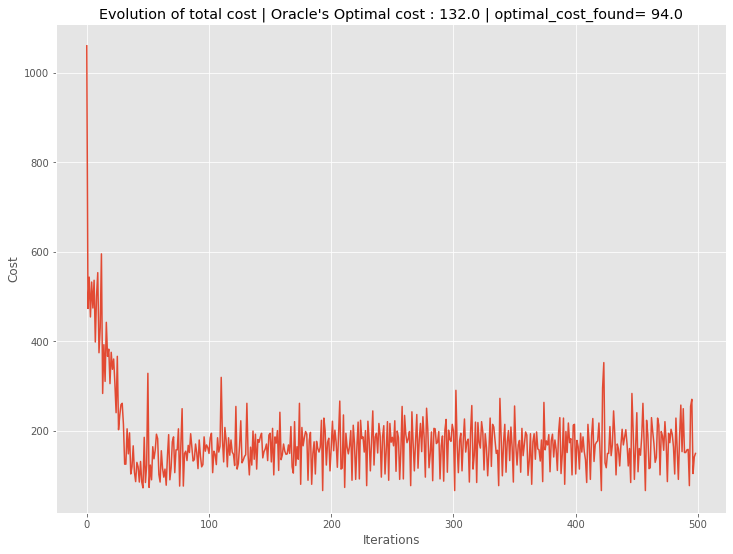

****************************************************************************************************************************
Using Gamma for hybrid agents  = 7
Agents creation, fixed (start, destination) assignment and all possible paths computation ...
Agents creation, fixed (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 947 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  128.0
 => The optimal paths are :  [[7, 6], [7, 4], [2, 5, 8], [2, 3, 1], [3, 6], [8, 9, 12], [11, 8, 9, 6, 5], [10, 7, 3, 2]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
hyb1   {'path': [7, 4, 3, 6], 'cost': 35.0}
hyb2   {'path': [7, 10, 6, 3, 1, 4], 'cost': 52.0}
hyb3   {'path': [2, 5, 8], 'cost': 24.0}
hyb4   {'path': [2, 3, 4, 1], 'cost': 32.0}
Final total cost on the network : 143.0


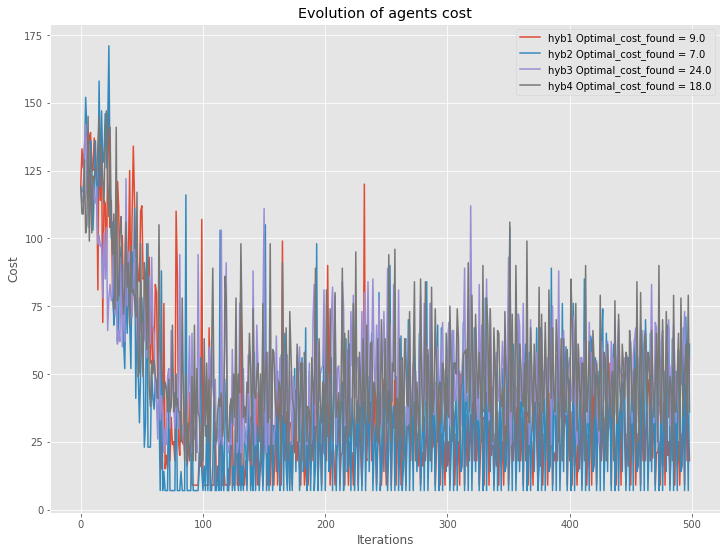

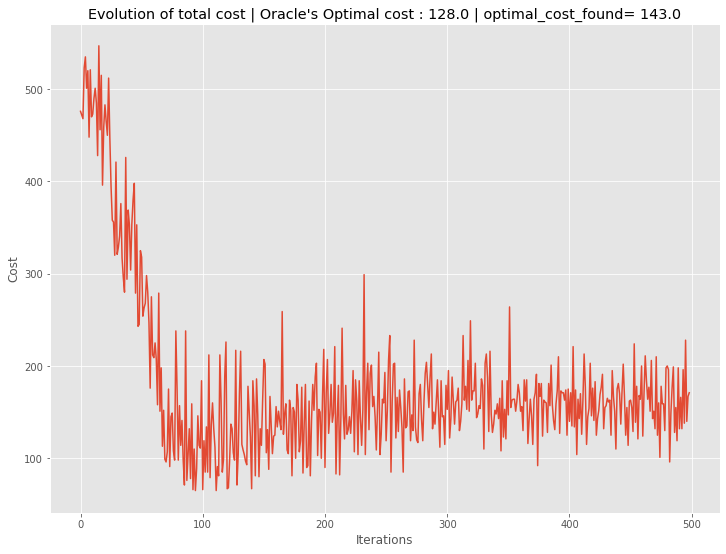

****************************************************************************************************************************
Using Gamma for hybrid agents  = 10
Agents creation, fixed (start, destination) assignment and all possible paths computation ...
Agents creation, fixed (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 1 seconds, only 1090 combinations where tested
Total time to compute costs:1.00 s
 => The minimal cost is :  132.0
 => The optimal paths are :  [[7, 6], [7, 4], [2, 5, 8], [2, 3, 1], [12, 9, 6, 3], [9, 10], [6, 3, 4, 1], [8, 9, 10]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
hyb1   {'path': [7, 10, 6], 'cost': 16.0}
hyb2   {'path': [7, 4], 'cost': 7.0}
hyb3   {'path': [2, 3, 6, 5, 8], 'cost': 49.0}
hyb4   {'path': [2, 5, 8, 9, 6, 10, 7, 3, 1], 'cost': 72.0}
Final total cost on the network : 144.0


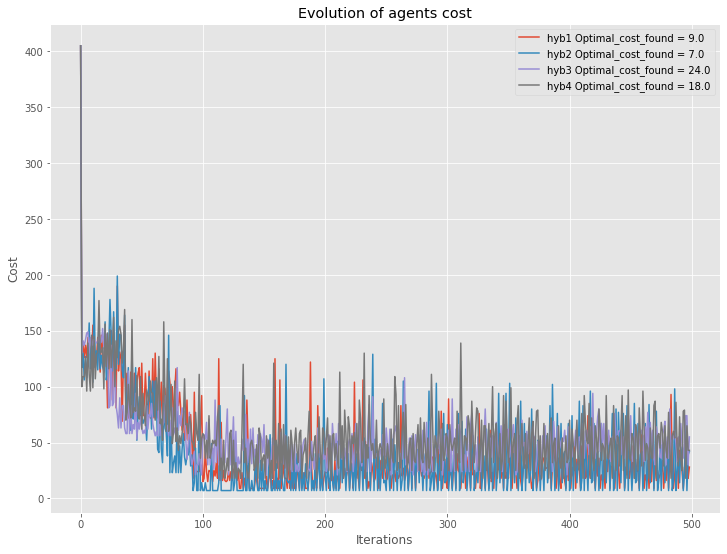

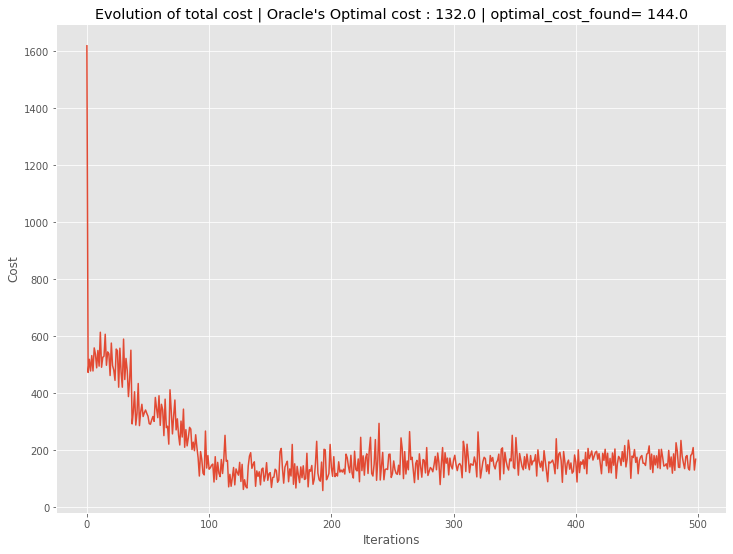

****************************************************************************************************************************


In [4]:
n_players = 4
gammas = [0.5, 1, 3, 7, 10]
graph = 'OW'
g, adj_matrix, all_edges = create_graph(graph_type=graph, number_vertices=20, dropout_edge_rate=0.85)
for i, gamma in enumerate(gammas) : 
    print('Using Gamma for hybrid agents  = {}'.format(gamma), end='\n')
    if i==0:
        summary_experiences, dests = run_experiment_compar(g, adj_matrix, all_edges, assignement_type='fixed', nb_iterations=500, n_sto=0, n_adv=0, n_hyb=n_players, 
                                   n_rand=3, n_fix=1, exploration_parameter_stoc=5, eta_hyb=0.1, Bt_hyb=0.01, use_adaptif_lr_hyb=True,
                                gamma_hyb=gamma, time_limit=1)
    else:
        summary_experiences, dests = run_experiment_compar(g, adj_matrix, all_edges, assignement_type='fixed', assignement_dests=dests, nb_iterations=500, n_sto=0, n_adv=0, n_hyb=n_players, 
                                   n_rand=3, n_fix=1, exploration_parameter_stoc=5, eta_hyb=0.1, Bt_hyb=0.01, use_adaptif_lr_hyb=True,
                                gamma_hyb=gamma, time_limit=1)
        

**Impact of Bt parameter for Hybrid agent**

In [ ]:
n_players = 2
B_ts = [0.01, 0.1, 0.5, 1, 2]
graph = 'OW'
g, adj_matrix, all_edges = create_graph(graph_type=graph, number_vertices=20, dropout_edge_rate=0.85)
for i, Bt in enumerate(B_ts) : 
    print('Using B_t for hybrid agents  = {}'.format(Bt), end='\n')
    if i==0:
        summary_experiences, dests = run_experiment_compar(g, adj_matrix, all_edges, assignement_type='fixed', nb_iterations=100, n_sto=n_players, n_adv=n_players, n_hyb=n_players, 
                                   n_rand=0, n_fix=0, exploration_parameter_stoc=5, eta_hyb=0.1, Bt_hyb=Bt, use_adaptif_lr_hyb=True,
                                gamma_hyb=1., time_limit=40)
    else:
        summary_experiences, dests = run_experiment_compar(g, adj_matrix, all_edges, assignement_type='fixed', assignement_dests=dests, nb_iterations=100, n_sto=n_players, n_adv=n_players, n_hyb=n_players, 
                                   n_rand=0, n_fix=0, exploration_parameter_stoc=5, eta_hyb=0.1, Bt_hyb=Bt, use_adaptif_lr_hyb=True,
                                gamma_hyb=1., time_limit=40)
        

**Comparing the behavior of algorithms when adding random agents** 

Graph creation...
Graph creation : Done
-------------------------------------------------------------------------------------------
Number of agents with random path = 1
Agents creation, fixed (start, destination) assignment and all possible paths computation ...
Agents creation, fixed (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 30 seconds, only 13185 combinations where tested
Total time to compute costs:30.01 s
 => The minimal cost is :  7.0
 => The optimal paths are :  [[4, 10], [14, 3, 5, 11], [3, 18, 19], [16, 10]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
sto1   {'path': [4, 10], 'cost': 1.0}
adv1   {'path': [14, 8, 4, 10, 16, 1, 17, 6, 3, 13, 2, 18, 19, 12, 9, 7, 5, 15, 11], 'cost': 18.0}
hyb1   {'path': [3, 14, 10, 1, 11, 15, 5, 7, 9, 12, 19], 'cost': 10.0}
Final total cost on the network : 29.0


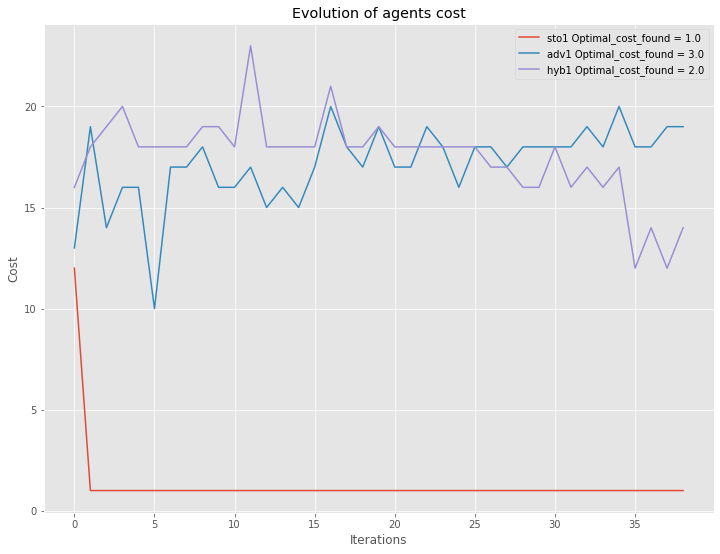

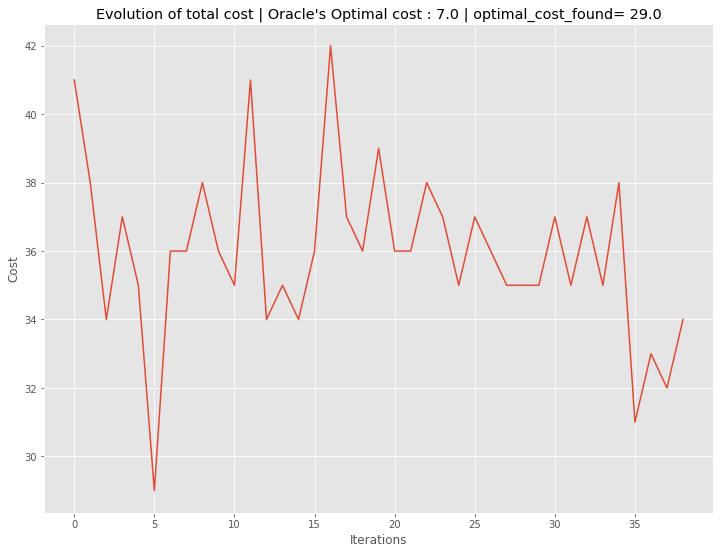

****************************************************************************************************************************
Number of agents with random path = 2
Agents creation, fixed (start, destination) assignment and all possible paths computation ...
Agents creation, fixed (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 30 seconds, only 15804 combinations where tested
Total time to compute costs:30.00 s
 => The minimal cost is :  13.0
 => The optimal paths are :  [[4, 10], [14, 3, 5, 11], [3, 18, 19], [12, 1, 15, 2], [14, 3, 13]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
sto1   {'path': [4, 10], 'cost': 1.0}
adv1   {'path': [14, 9, 12, 7, 15, 13, 2, 18, 19, 17, 1, 16, 10, 4, 6, 3, 5, 11], 'cost': 17.0}
hyb1   {'path': [3, 13, 2, 15, 11, 12, 7, 5, 9, 14, 10, 1, 19], 'cost': 12.0}
Final total cost on the network : 30.0


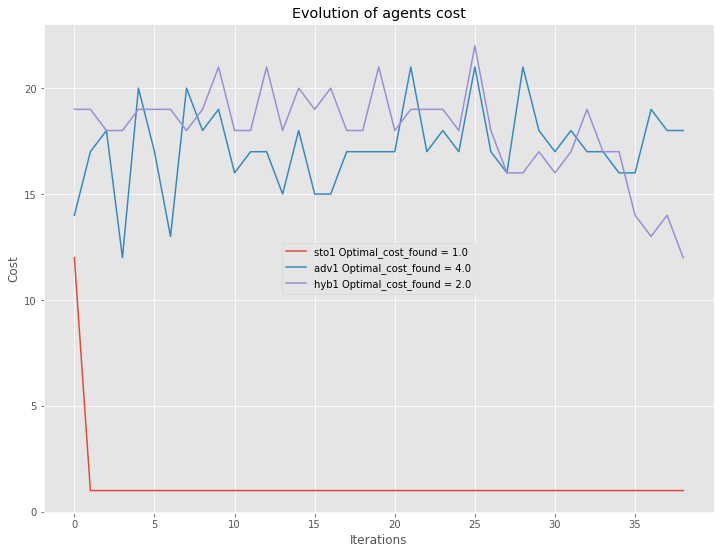

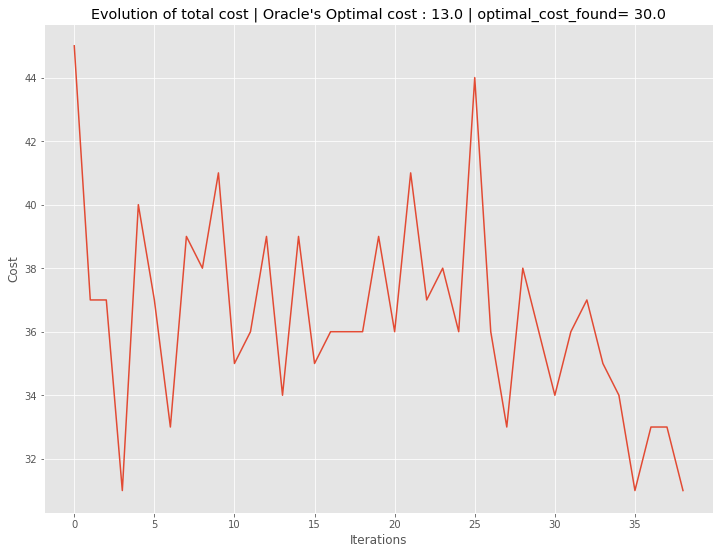

****************************************************************************************************************************
Number of agents with random path = 5
Agents creation, fixed (start, destination) assignment and all possible paths computation ...
Agents creation, fixed (start, destination) assignment and all possible paths computation  : Done
-------------------------------------------------------------------------------------------
Oracle calculations ==> Global optimal paths and costs...
Time depassed 30 seconds, only 11940 combinations where tested
Total time to compute costs:30.01 s
 => The minimal cost is :  25.0
 => The optimal paths are :  [[4, 10], [14, 3, 5, 11], [3, 18, 19], [18, 1, 10, 4], [17, 1, 9, 7], [18, 1, 9, 7], [1, 15], [7, 9, 14, 8]]
Oracle calculations ==> Global optimal paths and costs : Done
-------------------------------------------------------------------------------------------



Paths found by the agents :
sto1   {'path': [4, 10], 'cost': 1.0}
adv1   {'path': [14, 9, 7, 5, 3, 18, 2, 13, 15, 16, 1, 10, 4, 6, 17, 19, 12, 11], 'cost': 17.0}
hyb1   {'path': [3, 5, 15, 16, 12, 7, 9, 14, 10, 1, 19], 'cost': 11.0}
Final total cost on the network : 29.0


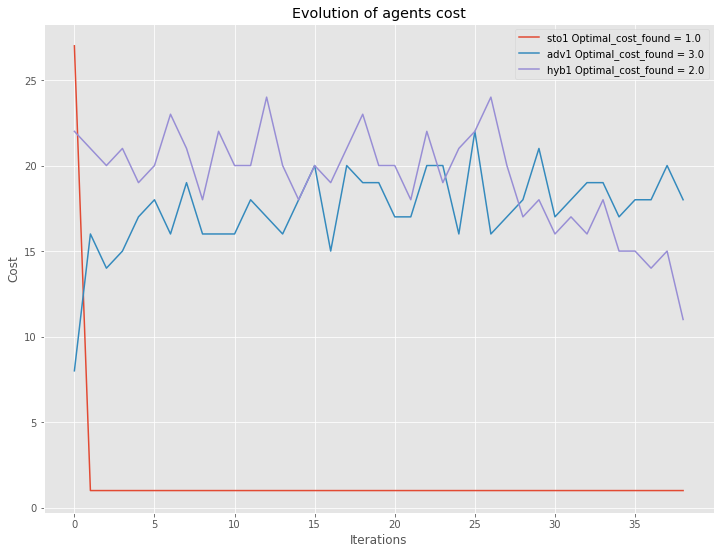

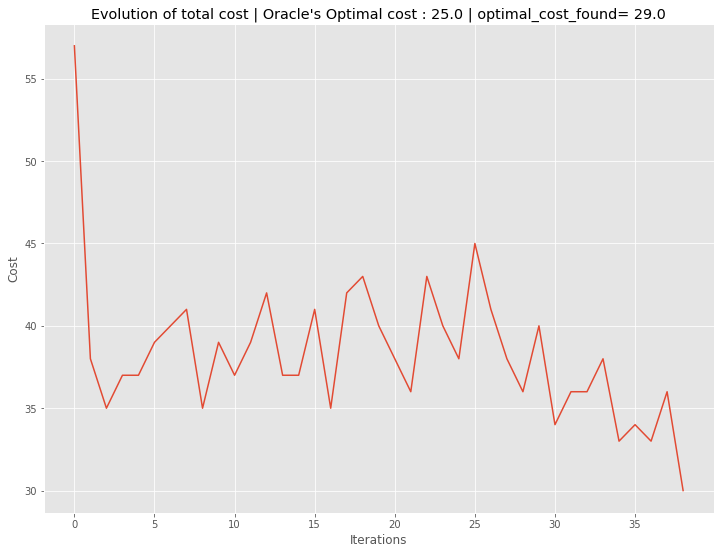

****************************************************************************************************************************
Number of agents with random path = 8
Agents creation, fixed (start, destination) assignment and all possible paths computation ...


KeyboardInterrupt: 

In [36]:
n_players = 1
n_rnd_agents = [1, 2, 5, 8, 10]
graph = 'Random_Sparse_graph'
g, adj_matrix, all_edges = create_graph(graph_type=graph, number_vertices=20, dropout_edge_rate=0.8)
for i, n_randx in enumerate(n_rnd_agents) : 
    print('Number of agents with random path = {}'.format(n_randx), end='\n')
    if i==0:
        summary_experiences, dests = run_experiment_compar(g, adj_matrix, all_edges, assignement_type='fixed', nb_iterations=100, n_sto=n_players, n_adv=n_players, n_hyb=n_players, 
                                   n_rand=n_randx, n_fix=0, exploration_parameter_stoc=5, eta_hyb=0.1, Bt_hyb=0.01, use_adaptif_lr_hyb=False,
                                gamma_hyb=1., time_limit=30)
    else:
        summary_experiences, dests = run_experiment_compar(g, adj_matrix, all_edges, assignement_type='fixed', assignement_dests=dests, nb_iterations=100, n_sto=n_players, n_adv=n_players, n_hyb=n_players, 
                                   n_rand=n_randx, n_fix=0, exploration_parameter_stoc=5, eta_hyb=0.1, Bt_hyb=0.01, use_adaptif_lr_hyb=False,
                                gamma_hyb=1., time_limit=30)
        

**Comparing the behavior of algorithms when adding fixed agents** 

In [ ]:
n_players = 1
n_fixd_agents = [1, 2, 5, 8, 10]
graph = 'Sioux_Falls'
g, adj_matrix, all_edges = create_graph(graph_type=graph, number_vertices=20, dropout_edge_rate=0.8)
for i, fixd in enumerate(n_fixd_agents) : 
    print('Number of agents with fixed path = {}'.format(fixd), end='\n')
    if i==0:
        summary_experiences, dests = run_experiment_compar(g, adj_matrix, all_edges, assignement_type='fixed', nb_iterations=150, n_sto=n_players, n_adv=n_players, n_hyb=n_players, 
                                   n_rand=0, n_fix=fixd, exploration_parameter_stoc=5, eta_hyb=0.1, Bt_hyb=0.01, use_adaptif_lr_hyb=True,
                                gamma_hyb=1., time_limit=20)
    else:
        summary_experiences, dests = run_experiment_compar(g, adj_matrix, all_edges, assignement_type='fixed', assignement_dests=dests, nb_iterations=150, n_sto=n_players, n_adv=n_players, n_hyb=n_players, 
                                   n_rand=0, n_fix=fixd, exploration_parameter_stoc=5, eta_hyb=0.1, Bt_hyb=0.01, use_adaptif_lr_hyb=True,
                                gamma_hyb=1., time_limit=20)
        